<a href="https://colab.research.google.com/github/pragnadeepak/Yolov8Segmentation/blob/main/Yolov8DogsSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Sep  6 09:56:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [3]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 22.8M/22.8M [00:00<00:00, 54.8MB/s]
2023-09-06 10:03:01.811430: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 10:03:02.662741: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

100% 104k/104k [00:00<00:00, 84.8MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 78.3ms
Speed: 0.6ms pre-process, 78.3ms inference, 381.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


/content


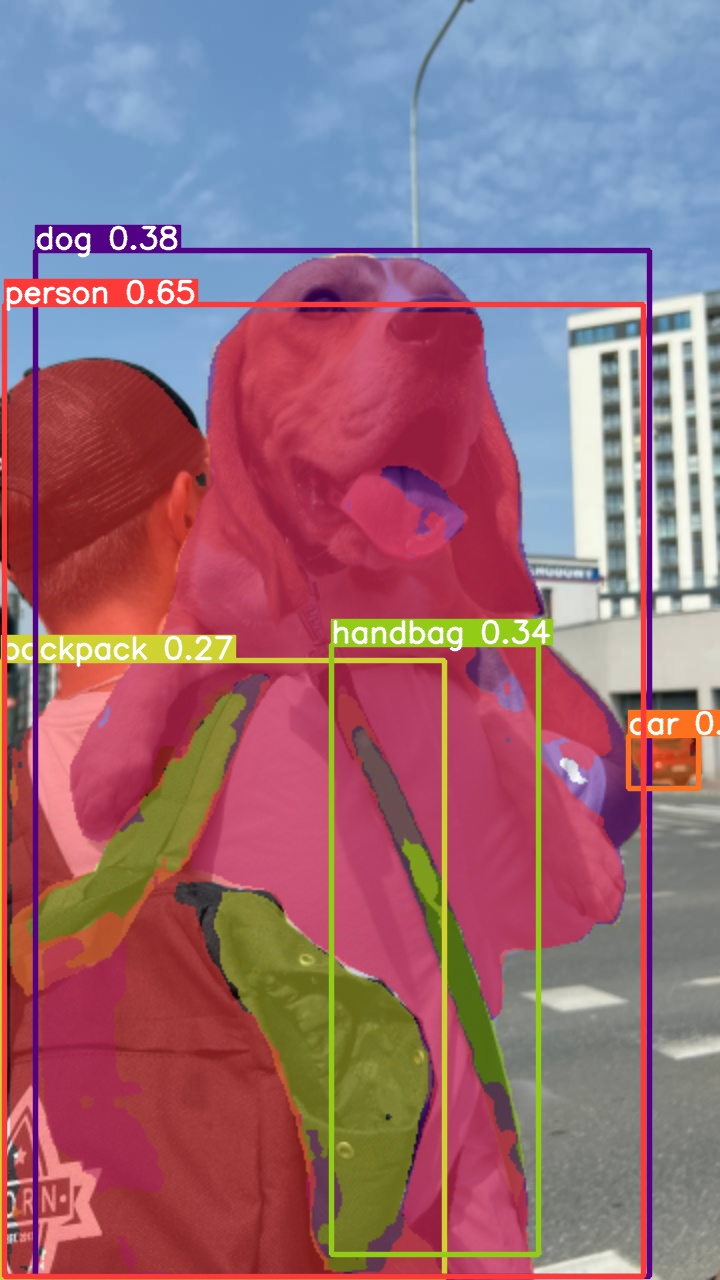

In [7]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=400)

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
path="/content/drive/MyDrive/Wavelabs/YoloV8Segmentation"

In [14]:
%cd '/content/drive/MyDrive/Wavelabs/YoloV8Segmentation'

/content/drive/MyDrive/Wavelabs/YoloV8Segmentation


In [15]:
!pwd

/content/drive/MyDrive/Wavelabs/YoloV8Segmentation


In [16]:
!ls

data.yaml  dogDataSet


In [17]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=30 imgsz=640 save=true

100% 22.8M/22.8M [00:00<00:00, 157MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpli

In [18]:
!ls runs/segment/train/

args.yaml					    results.csv
BoxF1_curve.png					    results.png
BoxP_curve.png					    train_batch0.jpg
BoxPR_curve.png					    train_batch1.jpg
BoxR_curve.png					    train_batch20.jpg
confusion_matrix.png				    train_batch21.jpg
events.out.tfevents.1693995061.99513de4917d.4878.0  train_batch22.jpg
MaskF1_curve.png				    train_batch2.jpg
MaskP_curve.png					    val_batch0_labels.jpg
MaskPR_curve.png				    val_batch0_pred.jpg
MaskR_curve.png					    weights


In [19]:
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=data.yaml

2023-09-06 10:13:54.936401: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 10:13:56.333907: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/Wavelabs/YoloV8Segmentation/dogDataSet/valid/labels.cache... 1 images, 0 backgrounds, 0 corrupt: 100% 1/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  4.71it/s]
                   all          1          1      0.953       

In [20]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=dogDataSet/test/images save=true

2023-09-06 10:15:21.644505: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 10:15:22.933437: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/drive/MyDrive/Wavelabs/YoloV8Segmentation/dogDataSet/test/images/2_jpg.rf.a6e83d1af0211cfdf4e840af3df11eb2.jpg: 640x640 2 dogss, 21.0ms
Speed: 0.8ms pre-process, 21.0ms inference, 101.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


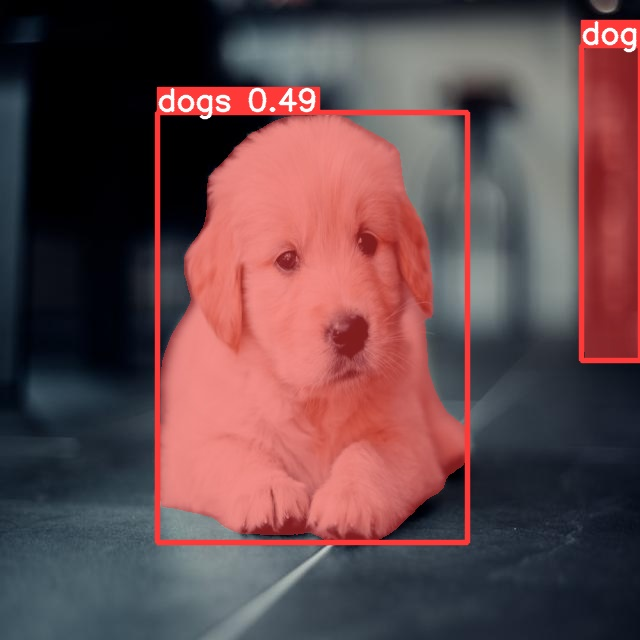

In [21]:

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

In [22]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source="dogDataSet/valid/images/3_jpg.rf.fc2e1d21f17104fe1701a4e28dae80d4.jpg" save=true

2023-09-06 10:17:07.319834: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 10:17:08.160650: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/drive/MyDrive/Wavelabs/YoloV8Segmentation/dogDataSet/valid/images/3_jpg.rf.fc2e1d21f17104fe1701a4e28dae80d4.jpg: 640x640 1 dogs, 20.9ms
Speed: 0.7ms pre-process, 20.9ms inference, 108.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


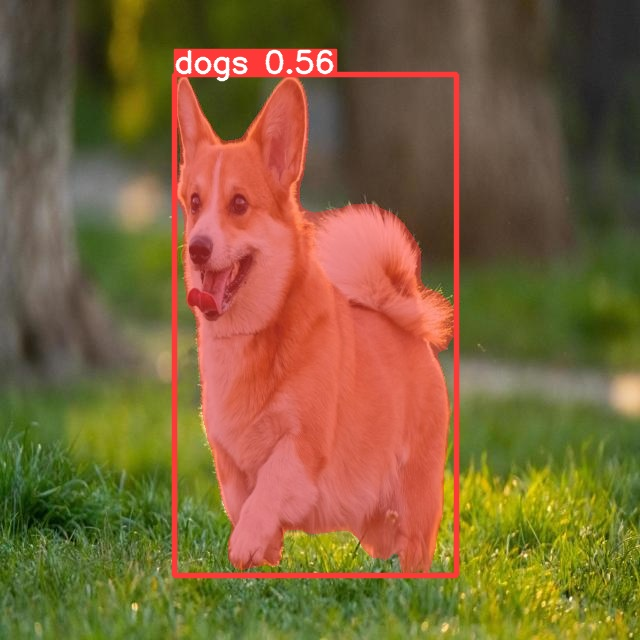

In [23]:
display(Image(filename="runs/segment/predict2/3_jpg.rf.fc2e1d21f17104fe1701a4e28dae80d4.jpg", height=600))

In [24]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source="https://thumbs.dreamstime.com/b/beautiful-happy-reddish-havanese-puppy-dog-sitting-frontal-looking-camera-isolated-white-background-46868560.jpg" save=true

2023-09-06 10:19:08.321117: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 10:19:09.610286: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

100% 42.9k/42.9k [00:00<00:00, 70.2MB/s]
image 1/1 /content/drive/MyDrive/Wavelabs/YoloV8Segmentation/beautiful-happy-reddish-havanese-puppy-dog-sitting-frontal-looking-camera-isolated-white-background-46868560.jpg: 640x512 1 dogs, 80.0ms
Speed: 0.7ms pre-process, 80.0ms inference, 96.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict3


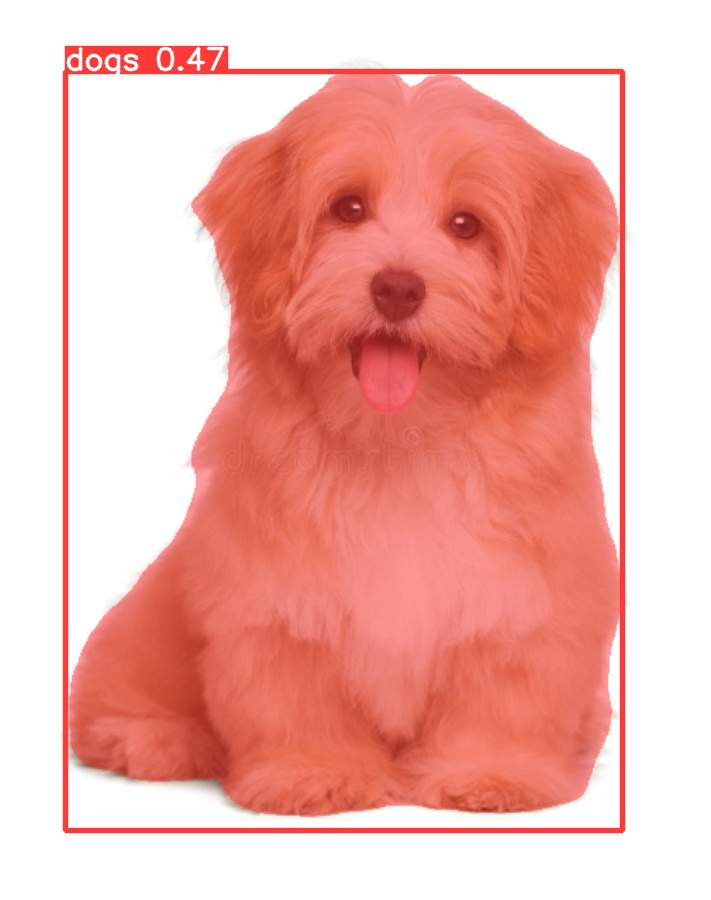

In [25]:
display(Image(filename="runs/segment/predict3/beautiful-happy-reddish-havanese-puppy-dog-sitting-frontal-looking-camera-isolated-white-background-46868560.jpg", height=600))